# SLU 05 - Covariance and Correlation: Exercise notebook

In [1]:
import pandas as pd 
import numpy as np 
import math 
import utils 

from matplotlib import pyplot as plt 
from utils import get_house_prices_and_rooms, plot_house_prices_and_rooms

# this is for grading without showing the answers 
import hashlib
def hash_answer(answer): 
    answer=str(answer)
    return hashlib.sha256((answer).encode()).hexdigest()

In this notebook you will practice the following: 

    - Covariance 
    - Pearson correlation
    - Spearman correlation
    - Correlation matrix
    - Spurious correlations

----

# Exercise 1: implement covariance 
Here you will implment covariance, by completing the following function.

Don't worry too much about generalizing, this will be an extremely naïve implementation, just to get your hands dirty!

Here is a quick reminder of the formula: 
$$ cov = \frac{\sum{(X - X_{avg})(Y - Y_{avg})}}{n-1} $$

Where `n` is the number of points in either X or Y.

#### Implement the following: 

In [3]:
def covariance_top_half(s1, s2):
    """ 
    Top half of the fraction 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        top_half_value (float): value of the top half of the fraction 
    """    
    # Note: it is generally best to do this is multiple small steps 
    # e.g. start by making s1_avg, then later s1_minus_s1_avg, etc...
    
    # YOUR CODE HERE
    return ((s1 - s1.mean()) * (s2 - s2.mean())).sum()

def covariance_bottom_half(s1, s2):
    """ 
    Bottom half of the fraction 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        bottom_half_value (float): value of the bottom half of the fraction 
    """    
    # YOUR CODE HERE
    return len(s1)-1


In [7]:
def covariance_top_half(s1, s2):
    """ 
    Top half of the fraction 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        top_half_value (float): value of the top half of the fraction 
    """    
    # Note: it is generally best to do this is multiple small steps 
    # e.g. start by making s1_avg, then later s1_minus_s1_avg, etc...
    
    # YOUR CODE HERE
    return ((s1 - s1.mean()) * (s2 - s2.mean())).sum()
        
        
    
def covariance_bottom_half(s1, s2):
    """ 
    Bottom half of the fraction 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        bottom_half_value (float): value of the bottom half of the fraction 
    """    
    # YOUR CODE HERE
    return len(s1)-1


def covariance_by_hand(s1, s2):
    top_half = covariance_top_half(s1, s2)
    bottom_half = covariance_bottom_half(s1, s2)
    return (top_half / bottom_half)

In [8]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
print('Covariance by hand between a and b: %0.02f' % covariance_by_hand(a, b))

Covariance by hand between a and b: 112.05


Expected output:   

    Covariance by hand between a and b: 112.05

In [9]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50]) 
c = pd.Series([22, 55, 23, 15, 92])
assert math.isclose(covariance_bottom_half(a, b), 4)
assert math.isclose(covariance_top_half(a, b), 448.2)
assert math.isclose(covariance_by_hand(a, b), 112.05)
assert math.isclose(covariance_by_hand(a, c), 230.2)

# Exercise 2: implement pearson correlation

Correlation is simply normalized covariance! 

$$ correlation = \frac{covariance(X, Y)}{\sqrt{Var(X) * Var(Y)}} $$

_Important note: if for some reason you really like to use numpy instead of pandas, please use ddof = 1. If this sentence didn't mean anything to you, just use pandas :)_ 

#### Complete here: 

In [10]:
def pearson_correlation_by_hand(s1, s2): 
    """ 
    Naive implementation of pearson correlation
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        pearson correlation (float): the correlation between s1 and s2 

    """
    
    # clue: remember, you've already implemented a function the top half in exercise one 
    # clue: for the square root you can use np.sqrt(...)
    
# YOUR CODE HERE
    
    pearson_correlation = (covariance_by_hand(s1, s2))/(((s1.std()**2)*(s2.std()**2)))**(1/2)
    
    return pearson_correlation


In [11]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
print('Correlation by hand between a and b: %0.02f' % pearson_correlation_by_hand(a, b))

Correlation by hand between a and b: 0.87


Expected output:   

    Correlation by hand between a and b: 0.87

In [12]:
assert round(pearson_correlation_by_hand(s1=pd.Series([2, 2, 7]), 
                                  s2=pd.Series([1, 12, 16])), 2) == .71

# Exercise 3: implement Spearman correlation 
Using your function `pearson_correlation_by_hand` calculate the Spearman correlation between `S1` and `S2`. 

So... what was Spearman correlation again?

_Note: don't use the pandas `.corr` to solve this, that would be cheating ;)_

In [13]:
def spearman_correlation_using_pearson(s1, s2): 
    """ 
    Naive implementation of spearman correlation
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        spearman_correlation (float): the correlation between s1 and s2 

    """
    
    # 
    # do the right transformation to s1 and s2
    transformed_s1 = s1.rank()
    transformed_s2 = s2.rank()
    
    
    # Use your pearson_correlation_by_hand function to get the spearman correlation 
    # spearman_correlation = ...
    spearman_correlation = pearson_correlation_by_hand(transformed_s1, transformed_s2)

    return spearman_correlation

In [14]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
print('Spearman correlation between a and b: %0.02f' % 
      spearman_correlation_using_pearson(a, b))

Spearman correlation between a and b: 0.90


Expected output:   

    Spearman correlation between a and b: 0.90

In [15]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
c = pd.Series([22, 55, 23, 15, 92])

assert math.isclose(spearman_correlation_using_pearson(a, b), a.corr(b, method='spearman'), abs_tol=.1)
assert math.isclose(spearman_correlation_using_pearson(b, c), b.corr(c, method='spearman'), abs_tol=.1)
assert math.isclose(spearman_correlation_using_pearson(c, a), c.corr(a, method='spearman'), abs_tol=.1)

----

# Exercise 4: enter an outlier 
We are going to analyze some house prices. In one case there will be no outliers, and in the other there will be a single outlier (maybe someone famous lived there) 

We will use regular pandas this time :) 

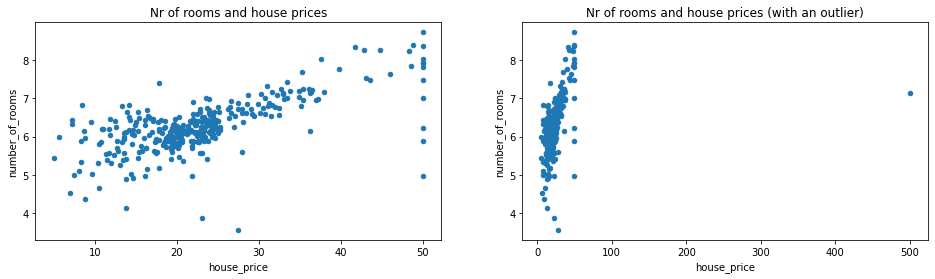

In [16]:
plot_house_prices_and_rooms()

In [17]:
def calculate_correlations_with_pandas(house_prices, number_of_rooms):
    
    # pearson_corr = ...
    # YOUR CODE HERE
    pearson_corr = pearson_correlation_by_hand(house_prices, number_of_rooms)

    # spearman_corr = ...
    # YOUR CODE HERE
    spearman_corr = spearman_correlation_using_pearson(house_prices, number_of_rooms)
    
    return pearson_corr, spearman_corr

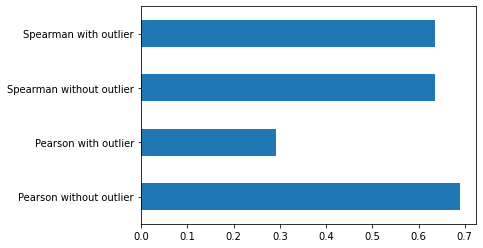

In [18]:
number_of_rooms, house_prices_normal, house_prices_with_outliers = get_house_prices_and_rooms()

pearson_corr_normal, spearman_corr_normal = calculate_correlations_with_pandas(house_prices_normal, 
                                                                               number_of_rooms)
pearson_corr_outlier, spearman_corr_outlier = calculate_correlations_with_pandas(house_prices_with_outliers, 
                                                                                 number_of_rooms)

# quick plot to see what happens
results = pd.Series({
    'Pearson without outlier': pearson_corr_normal,
    'Pearson with outlier': pearson_corr_outlier,
    'Spearman without outlier': spearman_corr_normal,
    'Spearman with outlier': spearman_corr_outlier,
})

results.plot(kind='barh')
plt.show()

Expected output 

    Pearson without outlier     0.689598
    Pearson with outlier        0.291450
    Spearman without outlier    0.635173
    Spearman with outlier       0.635284

In [19]:
assert math.isclose((pearson_corr_normal - pearson_corr_outlier), 0.398, abs_tol=.01)
assert math.isclose((spearman_corr_normal - spearman_corr_outlier), 0, abs_tol=.01)

# Exercise 5: Stocks! 

Time to predict the stockmarket and get ritch. 

In [93]:
import seaborn as sns 
stocks = pd.read_csv('data/Stock_prices.csv')

# Explore the dataset. 
# Hint 1: you can use display(<name of df>) to force it to pretty print
# Hint 2: use the heatmap of the correlation matrix that we used in the learning notebooks 
# Hint 3: you may want to import something to help with the visualization 
# Hint 4: you can either paste the answers, or use a purely programmatic solution. 
# Hint 5: when we say lowest and highest we mean the sign, not the "magnitude"

# YOUR CODE HERE
stocks.head()
#print(stocks.describe())

cor_mat = stocks.corr()
identity_matrix = np.identity(cor_mat.shape[0]).astype(bool)  # diagonal only 
corr_mat_without_diagonal = cor_mat.mask(identity_matrix)

# and now plot 
#plt.figure(figsize = (12,8))
#sns.heatmap(corr_mat_without_diagonal, annot=True, cmap='RdBu_r');

#Q1
corr_mat_without_diagonal.max()
corr_mat_without_diagonal.loc['ConocoPhillips'].idxmax()

#Q2
# # Q2: What is the stock pair with the lowest rank correlation with Occidental Petroleum? 
# (the answer is a string)
cor_rank = stocks.corr(method = 'spearman')
cor_rank
cor_rank.unstack().dropna().nsmallest(1)
#Q3
#corr_mat_without_diagonal.loc['Marathon Oil Corp.', 'Occidental Petroleum']

#Q4
#lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)
#cor_mat_lower = cor_mat.mask(lower_triangle_mask)
#cor_mat_lower_unstacked = cor_mat_lower.unstack().dropna()
#cor_mat_lower_unstacked.nlargest(4)



Occidental Petroleum  Cboe Global Markets   -0.825
dtype: float64

In [94]:
# Complete the following questions 

# Q1: what is the pair of stocks with the highest pearson correlation? 
# (pass the answer as a list, and remember, you can just type it in, no fancy pandas needed) 
stock_pair_with_highest_pearson_corr = ['ConocoPhillips','Marathon Oil Corp.']


# # Q2: What is the stock pair with the lowest rank correlation with Occidental Petroleum? 
# (the answer is a string)
lowest_rank_corr_with_occidental_petroleum = 'Occidental Petroleum  Cboe Global Markets   -0.825'

# Q3: what is the pearson correlation between Marathon Oil Corp. and Occidental Petroleum? 
# (answer is a float)
pearson_corr_between_marathon_oil_and_occidental_petr = 0.9130582339467762


# Q4: Observe the top 4 pearson correlation pairs, and then look at the general correlation matrix. 
# Is there a confounding variable that may explain why these companies are so correlated? 
possible_confounding_variable = 'Apache Corporation'

Expected output 

    No expected output on this one, see if it passes the test output ;) 

#### Test output (don't change code here) 

In [95]:
a = '9f94a681a8b473f6924ab5c42acaf8158fdb402c8d57a861f896dd17b09c2adb'
b = '52f85c820290f79a19a696f58cbb376e9034a21d66306565c29007facc7ab12d'
c = '0ab1e04f0684641e328c04b9485b4f50652e082ae4bb6541210e45c747a8f82f'

assert hash_answer(sorted(stock_pair_with_highest_pearson_corr)) == a
assert hash_answer(hash_answer(lowest_rank_corr_with_occidental_petroleum)) == b
assert math.isclose(pearson_corr_between_marathon_oil_and_occidental_petr, 0.9130, abs_tol=0.01)
assert hash_answer(possible_confounding_variable) == c

AssertionError: 

----

# Exercise 6: lots of stocks
You were hired by a hedge fund, because money. 

On the first day, your boss, Greedy Mc.Riskyface asked you to select one stock pair. He wants the two stocks to be as uncorrelated as possible (use pearson), so that he can short one and long the other. 

The answer should be (1) the two stocks, as a list and (2) their pearson correlation, as a float. 

In [83]:
stock_data = utils.get_stocks_data_2()

cor = stock_data.corr().unstack().dropna()
a=cor[cor < 0.0000001]
a[a > -0.0000001]

most_uncorrelated_pair = ['ZND', 'QKH']
most_uncorrelated_pair_value = -5.272460e-08


In [84]:
assert isinstance(most_uncorrelated_pair, list)
assert len(most_uncorrelated_pair) == 2
assert isinstance(most_uncorrelated_pair_value, float)
utils.dirty_little_secret()


    Ok, we tricked you, and it was unfair of us. 

    The reality is that this stock dataset was 100% RANDOM NUMBERS.

    The thing to remember is: if you use correlation without knowing the data, you will always find "something". 
    A lot of bad data science comes from over trusting the tools, without knowing the data. 

    If you have enough data and dig into it using correlations you will ALWAYS find something
    ... even if there is nothing to be found. 

    Correlation does not equal causality. 
    And sometimes, it just means you found signal where there was only noise.

    Now go on to the next SLU, and remember the day you modeled random numbers and found good stock picks :)  
    
